# Rigid Stellar Rotation and Gaussian Convolution

In [1]:
import numpy as np
from exojax.spec.rtransfer import nugrid
from exojax.spec import response

In [2]:
nus,wav,res=nugrid(23000,23100,2000,unit="AA")

In [3]:
#1 - delta function like
F=np.ones_like(nus)
F[1000]=0.0

In [4]:
vsini=100.0 #km/s

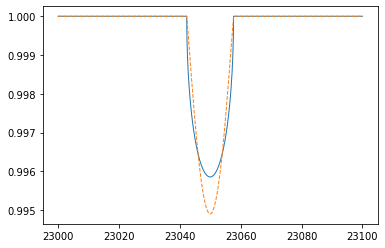

In [6]:
import matplotlib.pyplot as plt
plt.plot(wav,response.rigidrot(nus,F,vsini,u1=0.0,u2=0.0),lw=1)
plt.plot(wav,response.rigidrot(nus,F,vsini,u1=0.6,u2=0.4),lw=1,ls="dashed")
plt.show()

Gaussian covolution and velocity shift

In [7]:
beta=20.0 #std of gaussian
Frot=response.rigidrot(nus,F,vsini,u1=0.0,u2=0.0)
Fx=response.ipgauss_sampling(nus,nus,Frot,20.0,0.0)
Fxx=response.ipgauss_sampling(nus,nus,Frot,50.0,30.0)

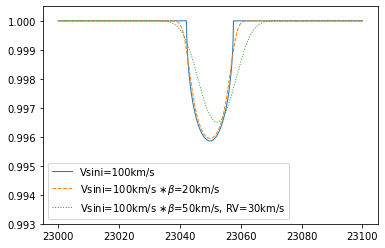

In [8]:
plt.plot(wav[::-1],Frot,lw=1,label="Vsini=100km/s")
plt.plot(wav[::-1],Fx,lw=1,ls="dashed",label="Vsini=100km/s $\\ast \\beta$=20km/s")
plt.plot(wav[::-1],Fxx,lw=1,ls="dotted",label="Vsini=100km/s $\\ast \\beta$=50km/s, RV=30km/s")
plt.legend(loc="lower left")
plt.ylim(0.993,1.0005)
plt.show()

In [9]:
#summation is conserved
print(np.sum(F))
print(np.sum(response.rigidrot(nus,F,vsini,u1=0.6,u2=0.4)))
print(np.sum(response.rigidrot(nus,F,vsini,u1=0.0,u2=0.0)))
print(np.sum(Fx))

1999.0
1999.0
1999.0
1999.0
